In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [12]:
Games_dados = pd.read_csv("../dados/GamesDados_v2.csv")

In [13]:
Games_dados['Vendas'] = Games_dados.Global_Sales_GenMed.map(lambda x: x > 0.999999 and 'Alto' or 'Baixo')

In [14]:
# Lista das features usadas no modelo de predição
variaveis_predicao = ['Code_Genre','Code_Platform','Global_Sales_GenMed']
# Variavel a ser predita
target = Games_dados['Vendas']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_features = Games_dados[variaveis_predicao]
y_target = target

Xtrain, Xtest, ytrain, ytest = train_test_split(X_features, y_target,random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [16]:
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, ypred)))

ACC TRAINING:1.0
ACC TEST:1.0


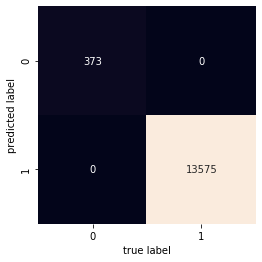

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       373
       Baixo       1.00      1.00      1.00     13575

    accuracy                           1.00     13948
   macro avg       1.00      1.00      1.00     13948
weighted avg       1.00      1.00      1.00     13948

